<a href="https://colab.research.google.com/github/lalitasharma04/face_mask_detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='lalitasharma04'
os.environ['KAGGLE_KEY']='83a1fd07f4e64ceff5d8826d0fbf6595'

In [4]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [7]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [9]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1568.jpg', '0690.jpg', '0746.jpg', '1096.jpg', '1323.jpg', '0639.jpg', '0414.jpg', '0515.png', '0188.jpg', '1020.jpg']
['231.jpg', '211.jpg', '32.jpg', '301.jpg', '120.jpg', '140.jpg', '142.jpg', '30.jpg', '249.jpg', '174.jpg']


['/content/New Masks Dataset/Train/Mask/1568.jpg', '/content/New Masks Dataset/Train/Mask/0690.jpg', '/content/New Masks Dataset/Train/Mask/0746.jpg', '/content/New Masks Dataset/Train/Mask/1096.jpg', '/content/New Masks Dataset/Train/Mask/1323.jpg', '/content/New Masks Dataset/Train/Mask/0639.jpg', '/content/New Masks Dataset/Train/Mask/0414.jpg', '/content/New Masks Dataset/Train/Mask/0515.png']
['/content/New Masks Dataset/Train/Non Mask/231.jpg', '/content/New Masks Dataset/Train/Non Mask/211.jpg', '/content/New Masks Dataset/Train/Non Mask/32.jpg', '/content/New Masks Dataset/Train/Non Mask/301.jpg', '/content/New Masks Dataset/Train/Non Mask/120.jpg', '/content/New Masks Dataset/Train/Non Mask/140.jpg', '/content/New Masks Dataset/Train/Non Mask/142.jpg', '/content/New Masks Dataset/Train/Non Mask/30.jpg']


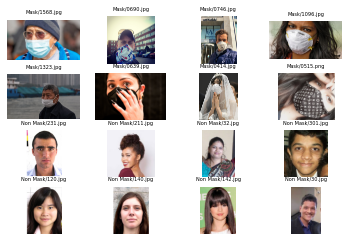

In [11]:
import matplotlib.image as mpimg
nrows=4
ncols=4
# plt.figure(figsize=(12,12))

mask_pic=[] #8 images from mask dir
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
nomask_pic=[] #8 images from mask dir
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
print(mask_pic)
print(nomask_pic)

merged_list=mask_pic+nomask_pic
for i in range(len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=5)
  plt.imshow(image,cmap='gray')
plt.show()

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                              zoom_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True
                              )
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
test_generator=test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )
validation_generator=validation_datagen.flow_from_directory(valid_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary'
                                                  )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [14]:
train_generator.image_shape

(150, 150, 3)

In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)            

In [27]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
19/19 [==============================] - 13s 679ms/step - loss: 8.3392 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 12s 631ms/step - loss: 0.6961 - accuracy: 0.5252 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 12s 647ms/step - loss: 0.6927 - accuracy: 0.5285 - val_loss: 0.6925 - val_accuracy: 0.5163
Epoch 4/30
19/19 [==============================] - 12s 638ms/step - loss: 0.6693 - accuracy: 0.5703 - val_loss: 0.6597 - val_accuracy: 0.7190
Epoch 5/30
19/19 [==============================] - 12s 633ms/step - loss: 0.5903 - accuracy: 0.7043 - val_loss: 0.6197 - val_accuracy: 0.7451
Epoch 6/30
19/19 [==============================] - 12s 633ms/step - loss: 0.4464 - accuracy: 0.8050 - val_loss: 0.5326 - val_accuracy: 0.8137
Epoch 7/30
19/19 [==============================] - 12s 634ms/step - loss: 0.3058 - accuracy: 0.8855 - val_loss: 0.4248 - val_accuracy: 0.8497

In [29]:
model.save("/content/drive/MyDrive/model/face_mask.h5")

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

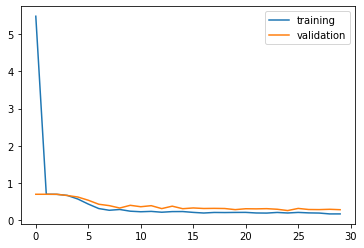

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])

In [33]:
test_loss,test_acc=model.evaluate(test_generator)
print("test loss ",test_loss,' accuracy ',test_acc)

4/4 [==============================] - 1s 273ms/step - loss: 0.2175 - accuracy: 0.9100
test loss  0.21747854351997375  accuracy  0.9100000262260437


In [38]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for file in uploaded.keys():
  img_path='/content/'+file
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(file)
  if prediction==0:
    print("mask")
  else:
    print("No mask")

Saving mask_wali.jpg to mask_wali (3).jpg
Saving no_mask_wali.jpg to no_mask_wali (3).jpg
mask_wali.jpg
mask
no_mask_wali.jpg
No mask
